In [9]:
import pandas as pd

In [10]:
raw_data = pd.read_csv('data/tweets.csv', encoding='latin1')

In [11]:
raw_data.columns = ['tweet', 'product', 'emotion']

In [12]:
raw_data.isnull().sum()

tweet         1
product    5802
emotion       0
dtype: int64

In [13]:
raw_data.duplicated().sum()

22

In [14]:
raw_data = raw_data.dropna(subset=['tweet']).drop_duplicates(subset=['tweet'])
#raw_data = raw_data.drop((raw_data.loc[raw_data['emotion']=="I can't tell"]).index)

In [15]:
raw_data['emotion'].value_counts(normalize=True)

No emotion toward brand or product    0.592609
Positive emotion                      0.327413
Negative emotion                      0.062769
I can't tell                          0.017209
Name: emotion, dtype: float64

In [16]:
X = raw_data['tweet']
y = raw_data['emotion'].replace({'No emotion toward brand or product':1, 'Positive emotion':2, 'Negative emotion':0, "I can't tell":1})

In [17]:
y.value_counts(normalize=True)

1    0.609818
2    0.327413
0    0.062769
Name: emotion, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10151997, stratify=y)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_extraction.text import TfidfVectorizer
# import string
# import nltk
# from nltk.corpus import stopwords
# from nltk import word_tokenize

In [ ]:
# nltk.download('stopwords')

In [ ]:
# stops = stopwords.words('english') + list(string.punctuation)

In [ ]:
# vectorizer = TfidfVectorizer(stop_words=stops)

# tf_idf_train = vectorizer.fit_transform(X_train)

# tf_idf_test = vectorizer.transform(X_test)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# classifier = RandomForestClassifier(random_state=10151997)
# classifier.fit(tf_idf_train, y_train)
# y_preds = classifier.predict(tf_idf_test)

In [ ]:
# classifier.score(tf_idf_test, y_test)

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# %matplotlib inline

# from sklearn.feature_extraction.text import CountVectorizer

# cv = CountVectorizer(stop_words = 'english')
# words = cv.fit_transform(X_train)

# sum_words = words.sum(axis=0)

# words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
# words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

# frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

# frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
# plt.title("Most Frequently Occuring Words - Top 30")
# plt.show()

In [ ]:
# from wordcloud import WordCloud

# wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

# plt.figure(figsize=(10,8))
# plt.imshow(wordcloud)
# plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

In [ ]:
# import re
# def hashtag_extract(x):
#     hashtags = []
    
#     for i in x:
#         ht = re.findall(r"#(\w+)", i)
#         hashtags.append(ht)

#     return hashtags

In [ ]:
# # extracting hashtags from non racist/sexist tweets
# HT_regular = hashtag_extract(data['tweet'][data['emotion'] == 'Positive emotion'])

# # extracting hashtags from racist/sexist tweets
# HT_negative = hashtag_extract(data['tweet'][data['emotion'] == 'Negative emotion'])

# # unnesting list
# HT_regular = sum(HT_regular,[])
# HT_negative = sum(HT_negative,[])

In [ ]:
# a = nltk.FreqDist(HT_regular)
# d = pd.DataFrame({'Hashtag': list(a.keys()),
#                   'Count': list(a.values())})

# # selecting top 20 most frequent hashtags     
# d = d.nlargest(columns="Count", n=20) 
# plt.figure(figsize=(16,5))
# ax = sns.barplot(x="Hashtag", y="Count", data=d)
# ax.set(ylabel = 'Count')
# plt.show()

In [ ]:
# b = nltk.FreqDist(HT_negative)
# e = pd.DataFrame({'Hashtag': list(b.keys()),
#                   'Count': list(b.values())})

# # selecting top 20 most frequent hashtags     
# e = e.nlargest(columns="Count", n = 20) 
# plt.figure(figsize=(16,5))
# ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
# ax.set(ylabel = 'Count')
# plt.show()

In [ ]:
# sample = X_train.sample(5, random_state=112221)
# for line in sample:
#     print(line, '\n')

In [19]:
from gensim.models import Word2Vec
from nltk import word_tokenize

In [21]:
X_train_tk = X_train.map(word_tokenize)

In [23]:
model_w2v = Word2Vec(X_train_tk, window=5, min_count=1, workers=4)
model_w2v.train(X_train_tk, total_examples=model_w2v.corpus_count, epochs=model_w2v.epochs)

(355386, 554140)

In [24]:
wv = model_w2v.wv

In [25]:
wv.most_similar('ipad')

[('5th', 0.9726181030273438),
 ('release', 0.9711360931396484),
 ('time', 0.9666376709938049),
 ('EMC', 0.9655402898788452),
 ('sale', 0.9592540264129639),
 ('week', 0.9585716724395752),
 ('hall', 0.9581940174102783),
 ('usurped', 0.9570767283439636),
 ('3G', 0.954505205154419),
 ('free', 0.9540424346923828)]

In [28]:
wv['ipad']

array([ 0.68739146, -0.29528815,  0.40368193, -0.08281577, -0.04817381,
        0.5154558 , -0.13685898,  0.11079225, -0.2621882 , -0.57415193,
       -0.25170824, -0.649579  , -0.01138498, -0.41113496, -0.8314543 ,
        0.18501127,  0.21183093,  0.262594  ,  0.16494612,  0.250454  ,
       -0.7451215 ,  0.7550061 ,  0.60288715, -1.3038323 , -0.353322  ,
        0.6174938 ,  0.08413692, -0.58500135, -0.22048481,  0.11824636,
        0.25705254, -0.849041  ,  0.07958219, -0.5784847 , -0.08038776,
        0.40920416,  0.21287751, -0.321003  ,  0.44096634,  0.64481866,
       -0.64734715, -0.6179839 ,  0.34649754,  0.12338163, -0.72340274,
        0.9052768 , -0.6419979 ,  0.33388588, -0.38548005,  0.0869269 ,
       -0.04768852,  0.25084352,  0.03894838, -0.15686421, -0.8840709 ,
       -0.25436005,  0.67209494, -0.6368732 , -0.5782453 ,  0.16185462,
       -0.5029469 , -0.92664087, -0.45618245, -0.84734803,  0.3523739 ,
        0.39030975, -1.1565034 ,  0.48676598, -0.2575353 , -0.05

In [32]:
wv.most_similar('sxsw')

[('SxSW', 0.9306219816207886),
 ('SXSW', 0.9265674352645874),
 ('sxsw2011', 0.9255348443984985),
 ('evo', 0.9162541031837463),
 ('startupbus', 0.9122118949890137),
 ('openbeta6', 0.911812424659729),
 ('asd', 0.9114189147949219),
 ('Hands', 0.9077771902084351),
 ('HowTo', 0.9067003130912781),
 ('thisisdare', 0.9060980081558228)]

In [34]:
total_vocabulary = set(word for X_train_tk in X_train_tk for word in X_train_tk)

In [35]:
len(total_vocabulary)

9370

In [36]:
glove = {}
with open('../glove.twitter.27B.50d.txt', 'rb') as f:
    for line in f:
        parts = line.split()
        word = parts[0].decode('utf-8')
        if word in total_vocabulary:
            vector = np.array(parts[1:], dtype=np.float32)
            glove[word] = vector

In [37]:
glove['ipad']

array([ 0.14204  ,  0.029991 , -1.2516   ,  0.39401  , -0.52173  ,
        0.25537  ,  0.1633   , -0.74328  ,  1.2628   ,  0.13236  ,
        0.7262   ,  0.96512  , -2.6846   ,  0.34117  , -0.5741   ,
        0.24163  ,  0.27403  ,  0.37684  ,  0.068288 ,  0.52228  ,
       -0.80694  , -0.32373  ,  0.27985  , -0.41846  , -1.042    ,
       -0.66838  , -0.59565  , -0.86743  ,  0.6568   , -0.20128  ,
       -0.62616  , -0.57294  , -0.48955  , -0.78757  ,  1.4415   ,
       -0.53431  ,  0.78231  , -1.0045   , -0.99397  , -0.23775  ,
       -1.0703   ,  0.29763  , -1.0449   , -0.0045156,  0.95644  ,
       -0.33156  , -0.45587  , -0.37665  , -0.72652  ,  0.2631   ],
      dtype=float32)

In [38]:
class W2vVectorizer(object):
    
    def __init__(self, w2v):
        # Takes in a dictionary of words and vectors as input
        self.w2v = w2v
        if len(w2v) == 0:
            self.dimensions = 0
        else:
            self.dimensions = len(w2v[next(iter(glove))])
    
    # Note: Even though it doesn't do anything, it's required that this object implement a fit method or else
    # it can't be used in a scikit-learn pipeline  
    def fit(self, X, y):
        return self
            
    def transform(self, X):
        return np.array([
            np.mean([self.w2v[w] for w in words if w in self.w2v]
                   or [np.zeros(self.dimensions)], axis=0) for words in X])

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [45]:
lr = Pipeline([('Vectorizer', W2vVectorizer(glove)),
               ('LogisticReg', LogisticRegression(max_iter=1000, random_state=1015))])

rf = Pipeline([('Vectorizer', W2vVectorizer(glove)),
               ('RandomFor', RandomForestClassifier(n_estimators=100, random_state=1015))]) 

svc = Pipeline([('Vectorizer', W2vVectorizer(glove)),
                ('SupportVec', SVC(random_state=1015))])

In [46]:
models = [('LogisticReg', lr),
          ('RandomFor', rf),
          ('SupportVec', svc)]

In [47]:
scores = [(name, cross_val_score(model, X_train_tk, y_train, cv=2).mean()) for name, model, in models]

In [48]:
scores

[('LogisticReg', 0.6357016769638129),
 ('RandomFor', 0.6368049426301854),
 ('SupportVec', 0.6098852603706972)]

In [49]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence

In [50]:
y_train = pd.get_dummies(y_train).values

In [51]:
tokenizer = text.Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(X_train))

list_tokenized_headlines = tokenizer.texts_to_sequences(X_train)
X_train_nn = sequence.pad_sequences(list_tokenized_headlines, maxlen=100)

In [52]:
model = Sequential()

In [57]:
embedding_size = 128
model.add(Embedding(20000, embedding_size))
model.add(LSTM(25, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

In [58]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
lstm (LSTM)                  (None, None, 25)          15400     
_________________________________________________________________
global_max_pooling1d (Global (None, 25)                0         
_________________________________________________________________
dropout (Dropout)            (None, 25)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                1300      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

In [62]:
# ⏰ This cell may take several minutes to run
model.fit(X_train_nn, y_train, epochs=10, batch_size=900, validation_split=0.4)

Epoch 1/10
4/4 [==============================] - 1s 351ms/step - loss: 0.8456 - accuracy: 0.6109 - val_loss: 0.8429 - val_accuracy: 0.6084
Epoch 2/10
4/4 [==============================] - 1s 340ms/step - loss: 0.8435 - accuracy: 0.6109 - val_loss: 0.8431 - val_accuracy: 0.6084
Epoch 3/10
4/4 [==============================] - 1s 346ms/step - loss: 0.8436 - accuracy: 0.6109 - val_loss: 0.8431 - val_accuracy: 0.6084
Epoch 4/10
4/4 [==============================] - 2s 555ms/step - loss: 0.8473 - accuracy: 0.6109 - val_loss: 0.8433 - val_accuracy: 0.6084
Epoch 5/10
4/4 [==============================] - 1s 371ms/step - loss: 0.8442 - accuracy: 0.6109 - val_loss: 0.8434 - val_accuracy: 0.6084
Epoch 6/10
4/4 [==============================] - 2s 398ms/step - loss: 0.8434 - accuracy: 0.6109 - val_loss: 0.8432 - val_accuracy: 0.6084
Epoch 7/10
4/4 [==============================] - 1s 329ms/step - loss: 0.8419 - accuracy: 0.6109 - val_loss: 0.8430 - val_accuracy: 0.6084
Epoch 8/10
4/4 [====

In [ ]:
if unknown_brand['text'].str.contains('mac book').any():
    print ("Mel is there")

In [ ]:
unknown_brand.loc[unknown_brand['text'].str.contains('apple')]

In [ ]:
unknown_brand.loc[(unknown_brand['text'].str.contains('iphone')) & (unknown_brand['text'].str.contains('google'))]

In [ ]:
raw_data.loc[raw_data['brand']=='google']

In [ ]:
raw_data.loc[1261,'text']

In [ ]:
unknown_brand.loc[4919,'text']

In [ ]:
unknown_brand.loc[9092, 'text']

In [ ]:
unknown_brand = raw_data.loc[raw_data['brand']=='unknown']
unknown_brand

In [ ]:
unknown_brand['target'].value_counts(normalize=True)

In [ ]:
# def name_brand(text):
#     text = text.lower()
#     apple_words = ['apple', 'iphone', 'ipad', 'itunes', 'mac', 'macbook']
#     google_words = ['google', 'android']
#     if (text.str.contains...

In [ ]:
from wordcloud import WordCloud

raw_wordcloud = WordCloud(background_color='white', width=800, height=800, colormap='Paired').generate_from_frequencies(dict(raw_freq))

plt.figure()
plt.imshow(raw_wordcloud)
#plt.title('SXSW Tweets Word Cloud')
plt.axis('off')
plt.show()

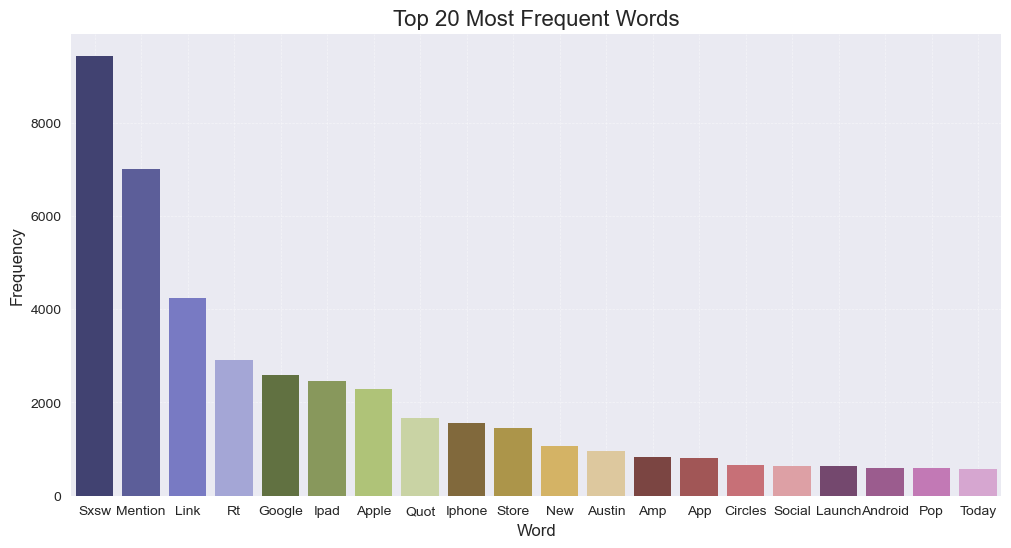

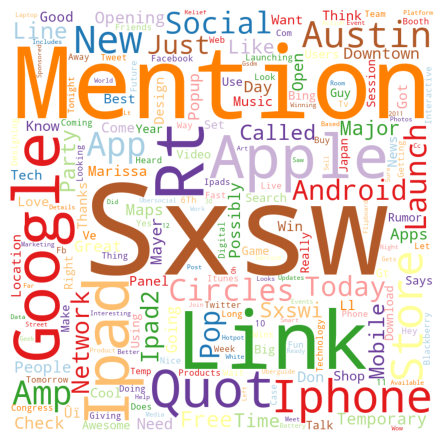

In [ ]:
string.punctuation

In [ ]:
test_series = raw_data['text']

In [ ]:
test_series = test_series.apply(lambda x: x.lower()).str.encode('ascii', 'ignore').str.decode('ascii')
test_series

In [ ]:
test_series = test_series.apply(lambda x: re.sub(r'http\S+', '', x)).apply(lambda x: re.sub(r'@\S*', '', x))
test_series


In [ ]:
test_series = test_series.apply(lambda x: re.split('\W+', x))
test_series

In [ ]:
test_series = test_series.apply(lambda x: [''.join(letter for letter in word if letter not in string.punctuation) for word in x])
test_series

In [ ]:
test_series = test_series.apply(lambda x: list(filter(None, x)))
test_series

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['sxsw','sxswi', 'link', 'quot'])
stopwords

In [ ]:
test_series.apply(lambda x: [word for word in x if word not in stopwords])

In [ ]:
new_test = X_train.copy()
new_test = preprocess(new_test)

In [ ]:
pd.DataFrame(new_test)

In [ ]:
positive_data = ' '.join(list(train_set_processed['text'].loc[train_set_processed['target']==2]))
positive_target = set(regex_token.tokenize(positive_data))

negative_data = ' '.join(list(train_set_processed['text'].loc[train_set_processed['target']==0]))
negative_target = set(regex_token.tokenize(negative_data))

neutral_data = ' '.join(list(train_set_processed['text'].loc[train_set_processed['target']==1]))
neutral_target = set(regex_token.tokenize(neutral_data))

In [ ]:
if ros:
        pipeline = ImPipeline(steps=[(str(vectorizer), vectorizer), ('ROS', ros), ('classifier', model['classifier'])])  
    else:
        pipeline = Pipeline(steps=[(str(vectorizer), vectorizer), ('classifier', model['classifier'])])

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [ ]:
training_sentences = X_train_processed.tolist()
testing_sentences = X_test_processed.tolist()
training_labels = y_train.tolist()
testing_labels = y_test.tolist()

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
vocab_size = 10000
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=112221)
padded_ros, training_labels_final_ros = ros.fit_resample(padded, training_labels_final)

In [ ]:
vocab_size = padded_ros.max()+1
embedding_dim = 128

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.LSTM(20, return_sequences=True),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()dd

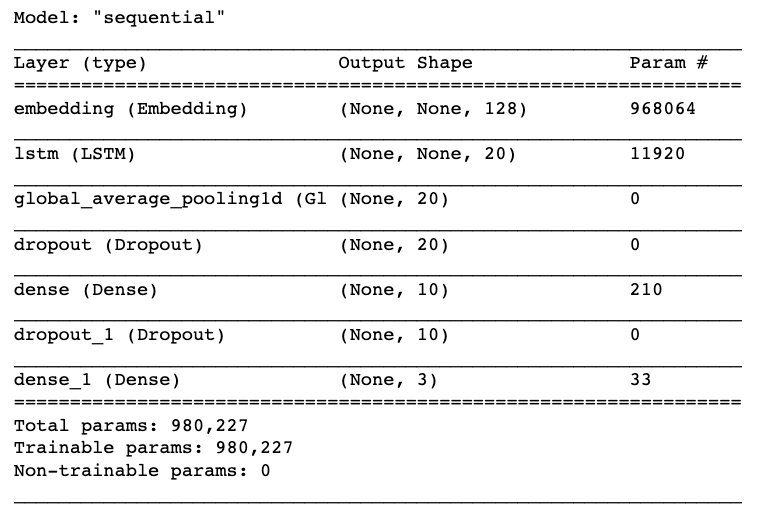

In [ ]:
model.fit(padded_ros, training_labels_final_ros, batch_size=64, epochs=25, validation_split=0.1, verbose=2)

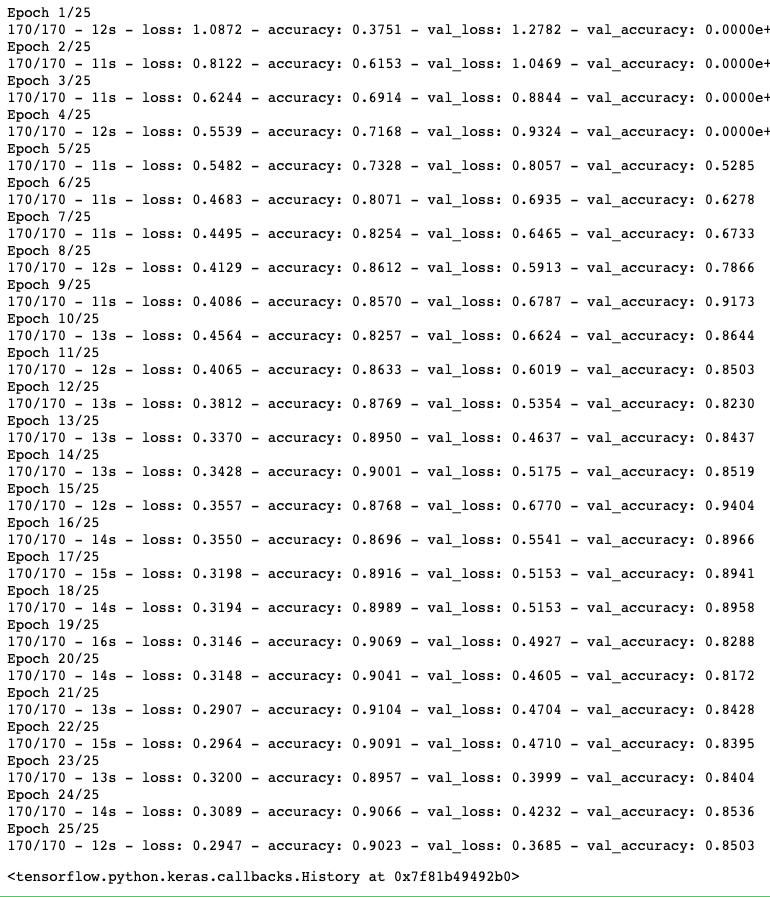

model.fit(padded_ros, training_labels_final_ros, batch_size=128, epochs=15, validation_data=(testing_padded, testing_labels_final))

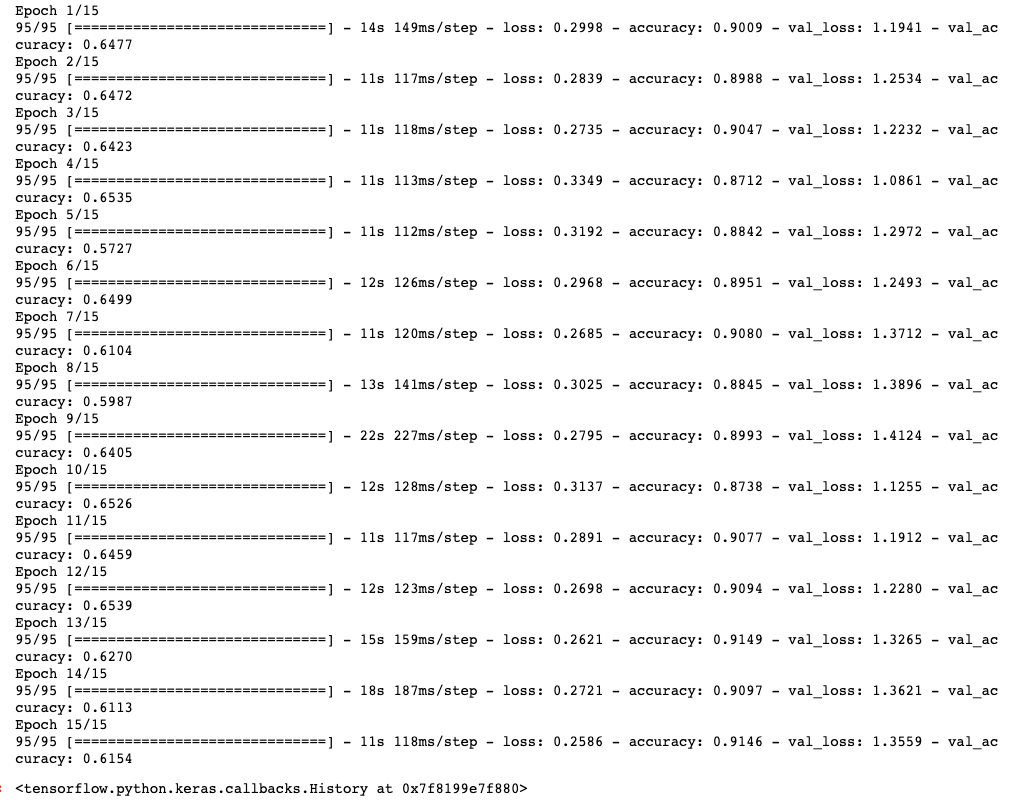

In [ ]:
vocab_size = padded_ros.max()+1
embedding_dim_new = 64

model_new = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim_new),
    tf.keras.layers.LSTM(32, activation='relu', return_sequences=True),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_new.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_new.summary()

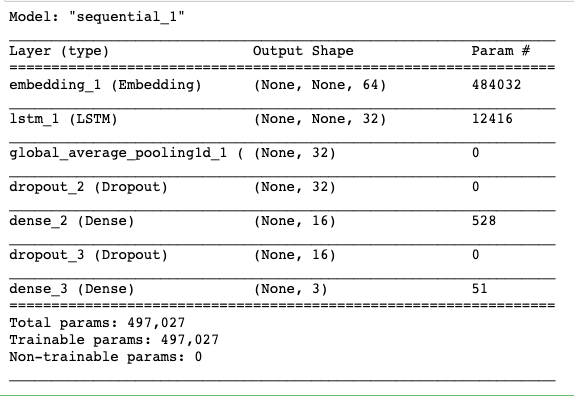

In [ ]:
history = model_new.fit(padded_ros, training_labels_final_ros, batch_size=64, epochs=50, validation_data=(testing_padded, testing_labels_final))

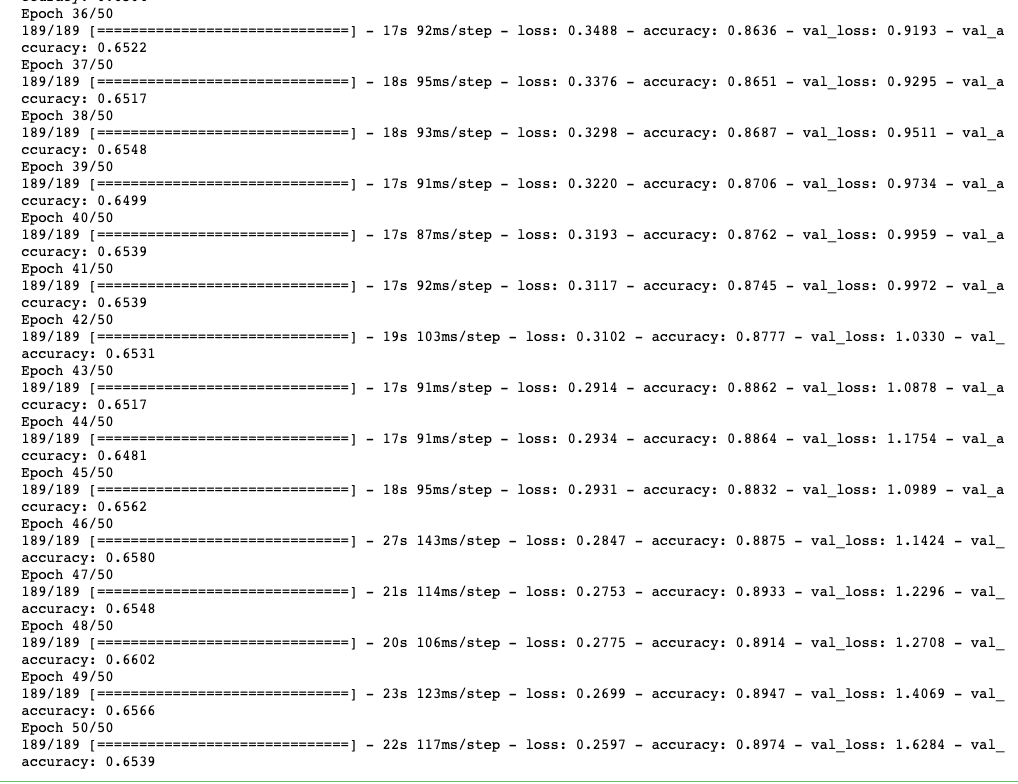

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

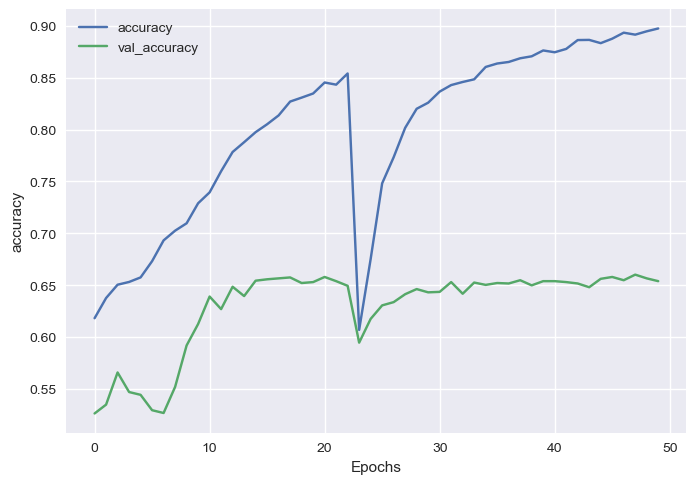

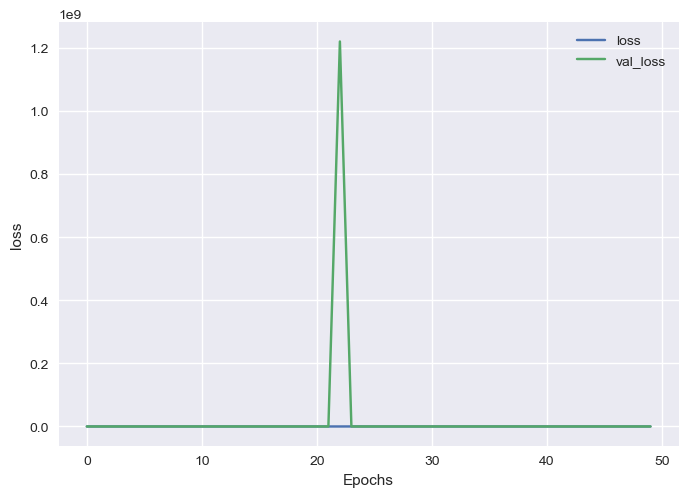

## Visualizing Word Embeddings

In [ ]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

In [ ]:
import io

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download the files
try:
    from google.colab import files
except ImportError:
    pass
else:
    files.download('vecs.tsv')
    files.download('meta.tsv')